In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import math as math
from scipy.special import softmax as sm



In [2]:
data = pd.read_csv('digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) 

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
def init():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def Relu(X):
    return np.maximum(X, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forwardProp(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = Relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReluDeriv(X):
    return Z > 0

def oneHot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backwardProp(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = oneHot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReluDeriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def updateParams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [6]:
def getPredictions(A):
    return np.argmax(A, 0)

def getAccuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def makePredictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forwardProp(W1, b1, W2, b2, X)
    predictions = getPredictions(A2)
    return predictions

#X_train[:, index, None]
def testPrediction(img, label, W1, b1, W2, b2):
    current_image = img
    prediction = makePredictions(img, W1, b1, W2, b2)
    print("Prediction: ", prediction)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

def gradientDescent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forwardProp(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backwardProp(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = updateParams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(getAccuracy(predictions, Y))
    
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradientDescent(X_train, Y_train, 0.1, 700)


Iteration:  0
[1 1 1 ... 5 1 5] [6 6 9 ... 8 1 3]
0.10285365853658536
Iteration:  10
[1 1 1 ... 8 1 3] [6 6 9 ... 8 1 3]
0.15195121951219512
Iteration:  20
[1 6 7 ... 8 1 3] [6 6 9 ... 8 1 3]
0.23002439024390245
Iteration:  30
[6 6 7 ... 8 1 3] [6 6 9 ... 8 1 3]
0.2975609756097561
Iteration:  40
[6 6 7 ... 8 1 3] [6 6 9 ... 8 1 3]
0.36365853658536584
Iteration:  50
[6 6 7 ... 8 1 3] [6 6 9 ... 8 1 3]
0.42717073170731706
Iteration:  60
[6 6 7 ... 9 1 3] [6 6 9 ... 8 1 3]
0.47717073170731705
Iteration:  70
[6 6 7 ... 9 1 3] [6 6 9 ... 8 1 3]
0.5186585365853659
Iteration:  80
[6 6 7 ... 9 1 3] [6 6 9 ... 8 1 3]
0.5540243902439025
Iteration:  90
[6 6 7 ... 9 1 3] [6 6 9 ... 8 1 3]
0.5844634146341463
Iteration:  100
[6 6 7 ... 9 1 3] [6 6 9 ... 8 1 3]
0.6111219512195122
Iteration:  110
[6 6 7 ... 9 1 3] [6 6 9 ... 8 1 3]
0.6356585365853659
Iteration:  120
[6 6 7 ... 9 1 3] [6 6 9 ... 8 1 3]
0.6568536585365854
Iteration:  130
[6 6 7 ... 9 1 3] [6 6 9 ... 8 1 3]
0.6758048780487805
Iteration: 

In [1]:
import PySimpleGUI as sg

# Layout du GUI
canvas_dimension = 28


layout = [
    [sg.Canvas(size=(canvas_dimension * 28 , canvas_dimension * 28), background_color='white', key='-CANVAS-')],
    [sg.Text('Prediction: ', size=(30, 1), key='-OUTPUT-')]
]

# Création de la fenêtre
window = sg.Window('Canvas avec PySimpleGUI', layout, finalize=True)

# Obtenir le canvas
canvas = window['-CANVAS-'].TKCanvas

drawn_zones = np.zeros((28, 28)).astype(float)
bouton1_enfonce = False

def setPress(event):
    bouton1_enfonce = True
    
def setUnPress(event):
    bouton1_enfonce = False
    
    result_vector = drawn_zones.T.flatten()
    result_vector = np.expand_dims(result_vector, axis=1)
    prediction = makePredictions(result_vector, W1, b1, W2, b2)[0]
    window['-OUTPUT-'].update(f'Prediction:{prediction}')
    
    
# Fonction pour afficher les coordonnées de la souris à chaque mouvement
def mouse_callback(event):
    # Récupérer les coordonnées du canvas depuis PySimpleGUI
    x, y = int(event.x / 28), int(event.y / 28)
    
    
    
    drawn_zones[x][y] = 1.
    glvl = 255 - drawn_zones[x][y] * 255
    
    canvas.create_rectangle(x * 28, y * 28, (x + 1) * 28, (y + 1) * 28 , fill='black')
    
    if x < len(drawn_zones - 1):
        drawn_zones[x + 1][y] = .25 if drawn_zones[x + 1][y] != 1 else 1
        glvl = 255 - drawn_zones[x + 1][y] * 255
        canvas.create_rectangle((x + 1) * 28, y * 28, (x + 2) * 28, (y + 1) * 28 , fill=sg.rgb(glvl, glvl, glvl))
    if y < len(drawn_zones[0] - 1):
        drawn_zones[x][y + 1] = .25 if drawn_zones[x][y + 1] != 1 else 1
        glvl = 255 - drawn_zones[x][y + 1] * 255
        canvas.create_rectangle(x * 28, (y + 1) * 28, (x + 1) * 28, (y + 2) * 28 , fill=sg.rgb(glvl, glvl, glvl))
    if x - 1 > 0:
        drawn_zones[x - 1][y] = .25 if drawn_zones[x - 1][y] != 1 else 1
        glvl = 255 - drawn_zones[x - 1][y] * 255
        canvas.create_rectangle((x - 1) * 28, y * 28, x * 28, (y + 1) * 28 , fill=sg.rgb(glvl, glvl, glvl))
    if y - 1 > 0:
        drawn_zones[x][y - 1] = .25 if drawn_zones[x][y - 1] != 1 else 1
        glvl = 255 - drawn_zones[x][y - 1] * 255
        canvas.create_rectangle(x * 28, (y - 1) * 28, (x + 1) * 28, y * 28 , fill=sg.rgb(glvl, glvl, glvl))
    
    
# Lier la fonction de rappel à l'événement de clic de la souris sur le canvas
canvas.bind("<Button-1>", setPress)
canvas.bind("<B1-Motion>", mouse_callback)
canvas.bind("<ButtonRelease-1>", setUnPress)


while True:
    event, values = window.read()
    if event == sg.WIN_CLOSED:
            break

            
window.close()

NameError: name 'np' is not defined

Prediction:  [5]


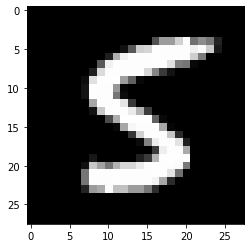

In [9]:

indexTets = 80
testPrediction(X_train[:, indexTets, None], Y_train[indexTets], W1, b1, W2, b2)


In [10]:
m

42000